<a href="https://colab.research.google.com/github/Dheandralf/MachineLearning/blob/main/UAS/UAS_Dheandra_1103213048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dheandra Alfarrelwijaya

NIM : 1103213048

Kelas : TK-45-04

Lecture: UAS

Dataset : MNIST

Model : Convolutional Neural Network (CNN)

Referensi :https://chatgpt.com/share/39a5cbd6-41cb-479d-a818-20873c27ea80,

          https://www.youtube.com/watch?v=0dI_tkI2-J

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
# Melakukan Preprosses dan melakukan load pada dataset mnist
(x_train, y_train), (x_test, y_test)  = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


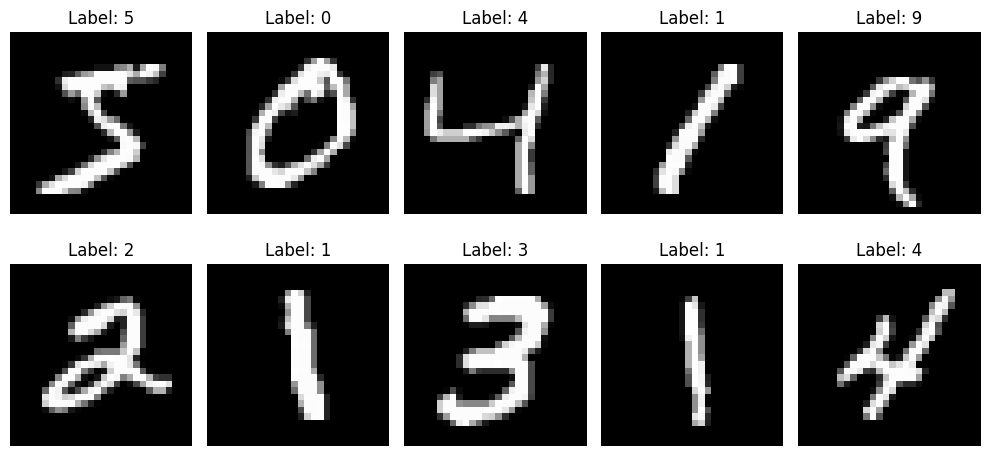

In [ ]:
# Menampilkan gambar yang berada dalam dataset MNIST
plt.figure(figsize=(10, 5))
for i in range(10):  # Menampilkan 10 gambar (bisa dirubah)
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Membangun model neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Mengubah gambar 2D menjadi 1D
    layers.Dense(128, activation='relu'),   # Lapisan tersembunyi dengan 128 neuron
    layers.Dropout(0.2),  # Lapisan tersembunyi dengan 64 neuron
    layers.Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron (klasifikasi 10 kelas)
])


In [ ]:
# Melakukan kompilasi pada data
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Melakukan latihan pada model dengan data train
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2931 - accuracy: 0.9158 - val_loss: 0.1390 - val_accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1394 - accuracy: 0.9579 - val_loss: 0.1026 - val_accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1073 - accuracy: 0.9681 - val_loss: 0.0885 - val_accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9725 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0751 - accuracy: 0.9762 - val_loss: 0.0764 - val_accuracy: 0.9785


In [ ]:
# Mengevaluasi Model dengan dataset MNIST
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



313/313 - 0s - loss: 0.0764 - accuracy: 0.9785 - 430ms/epoch - 1ms/step

Test accuracy: 0.9785000085830688


In [ ]:
# Prediksi pada data uji
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


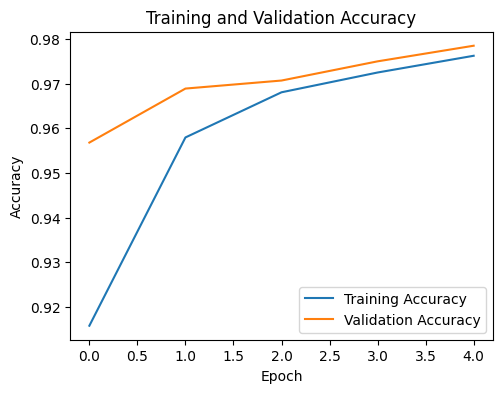

In [ ]:
# Menampilkan grafik akurasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()



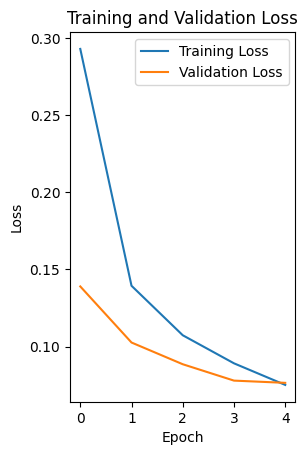

In [ ]:
# Menampilkan grafik akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

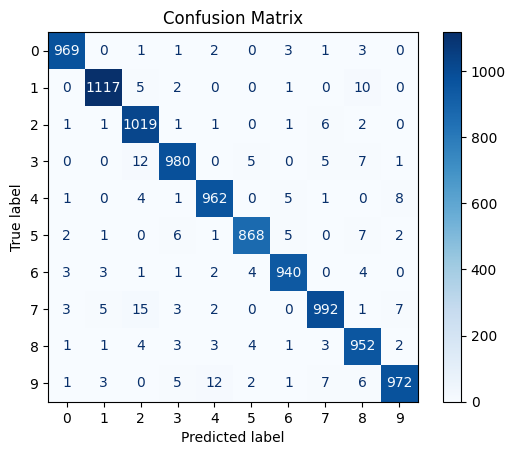

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()